In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
!pwd

/content/drive/My Drive/Colab Notebooks


In [0]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
#from image import *
from model import CSRNet
import torch
import matplotlib.image as mpimg
get_ipython().run_line_magic('matplotlib', 'inline')
import random


from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])



In [0]:
#set the root to the Shanghai dataset you download
root = '/content/drive/My Drive/Colab Notebooks/ShanghaiTech_Crowd_Counting_Dataset/'

#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_test]

In [0]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
print(len(img_paths))

182


In [0]:
x = random.randint(0,len(img_paths)-1)

In [0]:
##For example
file_path = img_paths[x].replace('.jpg','.h5').replace('images','ground_truth') 
print(file_path)

/content/drive/My Drive/Colab Notebooks/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/ground_truth/IMG_2.h5


In [0]:
model = CSRNet()
model = model.cuda()
checkpoint = torch.load('best55epochmodel_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
img = 255.0 * F.to_tensor(Image.open(img_paths[x]).convert('RGB'))
img = img.cuda()
img = transform(Image.open(img_paths[x]).convert('RGB')).cuda()
    
output = model(img.unsqueeze(0))

output = output.detach().cpu().numpy()
output = np.squeeze(output)
output = np.squeeze(output)

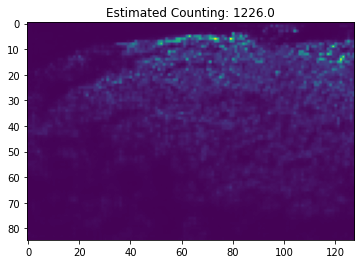

In [0]:
plt.title("Estimated Counting: " + str(round(output.sum())))
plt.imshow(output)

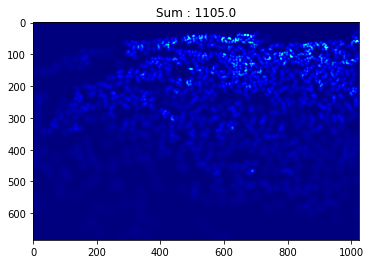

In [0]:
#Sample Ground Truth
gt_file = h5py.File(file_path,'r')
groundtruth = np.asarray(gt_file['density'])
plt.title("Sum : " +str(round(np.sum(groundtruth))))
plt.imshow(groundtruth,cmap=CM.jet)

/content/drive/My Drive/Colab Notebooks/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images_truth/IMG_116.jpg


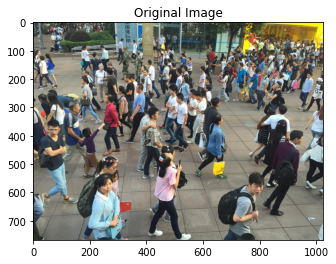

In [0]:
img = Image.open(file_path.replace('.h5','.jpg').replace('ground_truth','images'))
plt.imshow(img)
plt.title('Original Image')
print(file_path.replace('.h5','.jpg').replace('ground','images'))